## Project 1 Deep Learning

### Imports and Data Loading

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import tensorflow as tf
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Import train_images and train_labels using pickle
with open('/content/drive/MyDrive/Colab Notebooks/DL/Project1/636_project1_train_images', 'rb') as f:
    train_images = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/DL/Project1/636_project1_train_labels', 'rb') as f:
    train_labels = pickle.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


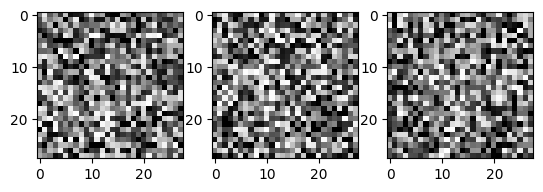

TensorShape([60000, 28, 28])

In [ ]:
#Showing 3 images in training set
fig, axs = plt.subplots(1, 3)
for i in range(3):
    axs[i].imshow(train_images[i], cmap='gray')
plt.show()

train_images.shape

In [ ]:
# Base Model Training on Clean Data
# from tensorflow.keras.datasets import mnist
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# from tensorflow import keras
# from tensorflow.keras import layers
# model = keras.Sequential([
#     layers.Flatten(input_shape=(28 * 28,)),  # Corrected input_shape
#     layers.Dense(512, activation="relu"),
#     layers.Dense(10, activation="softmax")
# ])

# model.compile(optimizer="rmsprop",
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])

# train_images = train_images.reshape((60000, 28 * 28))
# train_images = train_images.astype("float32") / 255
# test_images = test_images.reshape((10000, 28 * 28))
# test_images = test_images.astype("float32") / 255

# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="basemodel_cleandata.h5",
#         save_best_only=True,
#         monitor="val_loss")
# ]

# model.fit(train_images, train_labels, epochs=5, batch_size=128, callbacks=callbacks, validation_data=(test_images, test_labels))


Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.2623 - accuracy: 0.9254 - val_loss: 0.1382 - val_accuracy: 0.9585
Epoch 2/5
 55/469 [==>...........................] - ETA: 1s - loss: 0.1234 - accuracy: 0.9645

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - 3s 7ms/step - loss: 0.1081 - accuracy: 0.9683 - val_loss: 0.0886 - val_accuracy: 0.9734
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0714 - accuracy: 0.9791 - val_loss: 0.0750 - val_accuracy: 0.9775
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0511 - accuracy: 0.9845 - val_loss: 0.0681 - val_accuracy: 0.9788
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0390 - accuracy: 0.9880 - val_loss: 0.0624 - val_accuracy: 0.9805


In [ ]:
cleanModel=tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/DL/Project1/basemodel_cleandata.h5")

In [ ]:
#Resizing the images and scaling
train_images = train_images.numpy()
train_labels = train_labels.numpy()

train_images = train_images.astype('float32') / 255.0

train_images.shape
train_labels.shape

#Data Augmentationt tried to increase diversity of data but wasnpt helpful
# data_augmentation = keras.Sequential(
#     [
#         layers.RandomFlip("horizontal"), #flips the train_images horizontally
#         layers.RandomRotation(0.1), #randomly rotates the input image by a small angle
#         layers.RandomZoom(0.2), #randomly zooms in or out of the train_images
#     ]
# )

(60000,)

### Final Model  

The code for the final model is here. Different things are tried such as using base model, data augmentation, CNN, RNN, regularization, batch normalization etc. but the below code is the final model which gives the best val accuracy. Below this code is the other cell in which complete code is in one cell where different variations were tried but this code was separated as it gave best accuracy and model is saved in Rishabh_Bassi_532008692_Project1.h5

In [ ]:
inputs = keras.Input(shape=(28, 28, 1)) #size of train images 1 channel and 28*28 pixels.
# mod = data_augmentation(inputs) # was tried but didnt help
# mod = cleanModel # used pretrained model
mod = layers.Conv2D(32,(3,3), activation="relu")(inputs) #2D convolutional layer with 32 filters of size (3,3) with 'relu' activation function
mod = layers.MaxPooling2D((2,2))(mod) # for extracting higher level features and reducing the spatial dimensions of the feature maps
mod = layers.Conv2D(64,(3,3), activation="relu")(mod) #another 2D convolutional layer with 64 filters of size (3,3)
mod = layers.MaxPooling2D((2,2))(mod) #another max pooling layer with a pool size of (2,2)
mod = layers.Dropout(0.5)(mod) #dropout regularization - half of the units will be randomly dropped
mod = layers.Conv2D(128,(3,3), activation="relu")(mod) #another 2D convolutional layer with 128 filters of size (3,3)
mod = layers.Flatten()(mod) #change the output of the previous convolutional layer into a 1D vector
mod = Dense(128, activation='relu')(mod) #fully connected layer with 64 neurons to the flattened output
outputs = layers.Dense(10, activation="softmax")(mod) #another fully connected layer with 10 neurons

model = keras.Model(inputs=inputs, outputs=outputs) # final model by giving inputs outputs

In [ ]:
# Compile the model, specifying the optimizer, loss function, and evaluation metric.
# We use the Adam optimizer with a learning rate of 0.0005. Adam adapts the learning rate based on the loss gradient.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# For the loss function, we employ 'sparse_categorical_crossentropy,' which is a common choice for multi-class classification tasks.
loss_function = "sparse_categorical_crossentropy"

# Our model will be evaluated using the 'accuracy' metric, which measures the proportion of correctly classified images in the validation set.
evaluation_metric = ["accuracy"]

# Compile the model with the defined optimizer, loss function, and evaluation metric.
model.compile(optimizer=optimizer, loss=loss_function, metrics=evaluation_metric)

# Set up a callback to save the best-performing model to a file named 'Project1Model.h5.'
# With 'save_best_only=True,' only the model that performs the best on the validation set will be saved.
callbacks = [keras.callbacks.ModelCheckpoint("Rishabh_Bassi_532008692_Project1.h5", save_best_only=True)]


The current Fold is : 1
Epoch 1/20
313/313 [==============================] - 15s 9ms/step - loss: 2.2579 - accuracy: 0.1486 - val_loss: 2.0035 - val_accuracy: 0.2932
Epoch 2/20
 17/313 [>.............................] - ETA: 2s - loss: 2.0501 - accuracy: 0.2702

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 9ms/step - loss: 1.9623 - accuracy: 0.3066 - val_loss: 1.8622 - val_accuracy: 0.3469
Epoch 3/20
313/313 [==============================] - 3s 8ms/step - loss: 1.8478 - accuracy: 0.3541 - val_loss: 1.7541 - val_accuracy: 0.3875
Epoch 4/20
313/313 [==============================] - 3s 8ms/step - loss: 1.7071 - accuracy: 0.4078 - val_loss: 1.5830 - val_accuracy: 0.4561
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 1.5782 - accuracy: 0.4556 - val_loss: 1.4502 - val_accuracy: 0.5042
Epoch 6/20
313/313 [==============================] - 2s 8ms/step - loss: 1.4967 - accuracy: 0.4833 - val_loss: 1.3857 - val_accuracy: 0.5221
Epoch 7/20
313/313 [==============================] - 3s 9ms/step - loss: 1.4467 - accuracy: 0.5032 - val_loss: 1.3503 - val_accuracy: 0.5419
Epoch 8/20
313/313 [==============================] - 3s 8ms/step - loss: 1.4029 - accuracy: 0.5190 - val_loss: 1.3033 - val_accuracy: 0.5537
Epoch 9/20
313/31

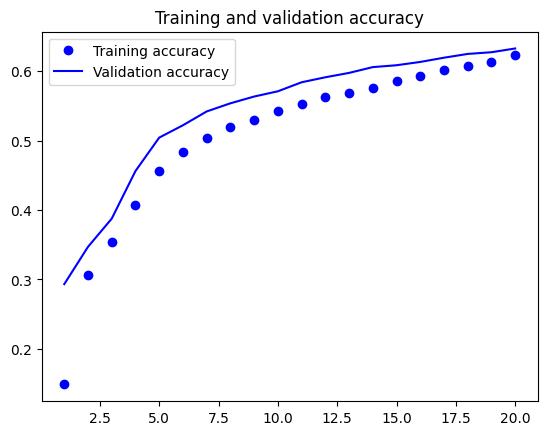

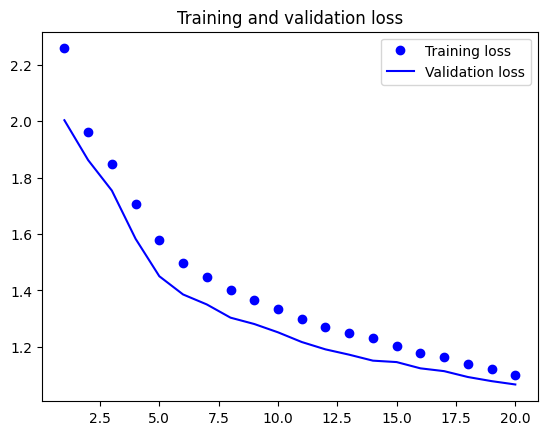

The current Fold is : 2
Epoch 1/20
313/313 [==============================] - 3s 9ms/step - loss: 1.1191 - accuracy: 0.6131 - val_loss: 0.9976 - val_accuracy: 0.6657
Epoch 2/20
313/313 [==============================] - 2s 8ms/step - loss: 1.0958 - accuracy: 0.6248 - val_loss: 0.9833 - val_accuracy: 0.6632
Epoch 3/20
313/313 [==============================] - 3s 9ms/step - loss: 1.0818 - accuracy: 0.6286 - val_loss: 0.9777 - val_accuracy: 0.6654
Epoch 4/20
313/313 [==============================] - 3s 10ms/step - loss: 1.0628 - accuracy: 0.6367 - val_loss: 0.9873 - val_accuracy: 0.6628
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 1.0492 - accuracy: 0.6406 - val_loss: 0.9750 - val_accuracy: 0.6665
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 1.0383 - accuracy: 0.6432 - val_loss: 0.9796 - val_accuracy: 0.6631
Epoch 7/20
313/313 [==============================] - 2s 8ms/step - loss: 1.0301 - accuracy: 0.6467 - val_loss: 0.9869 - va

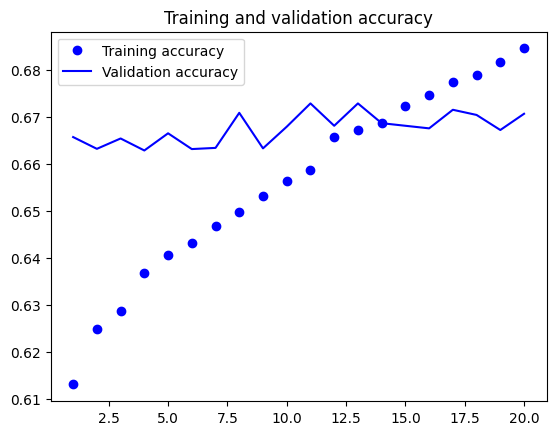

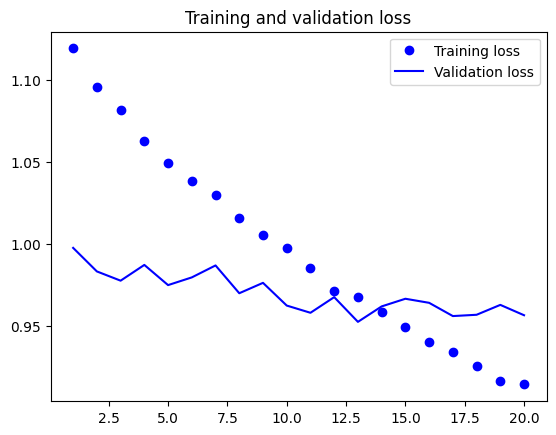

The current Fold is : 3
Epoch 1/20
313/313 [==============================] - 2s 8ms/step - loss: 0.9897 - accuracy: 0.6588 - val_loss: 0.8250 - val_accuracy: 0.7182
Epoch 2/20
313/313 [==============================] - 2s 8ms/step - loss: 0.9658 - accuracy: 0.6667 - val_loss: 0.8040 - val_accuracy: 0.7218
Epoch 3/20
313/313 [==============================] - 3s 8ms/step - loss: 0.9618 - accuracy: 0.6697 - val_loss: 0.8200 - val_accuracy: 0.7189
Epoch 4/20
313/313 [==============================] - 3s 8ms/step - loss: 0.9484 - accuracy: 0.6725 - val_loss: 0.8191 - val_accuracy: 0.7200
Epoch 5/20
313/313 [==============================] - 2s 8ms/step - loss: 0.9382 - accuracy: 0.6766 - val_loss: 0.8174 - val_accuracy: 0.7167
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 0.9299 - accuracy: 0.6768 - val_loss: 0.8234 - val_accuracy: 0.7120
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 0.9195 - accuracy: 0.6834 - val_loss: 0.8262 - val

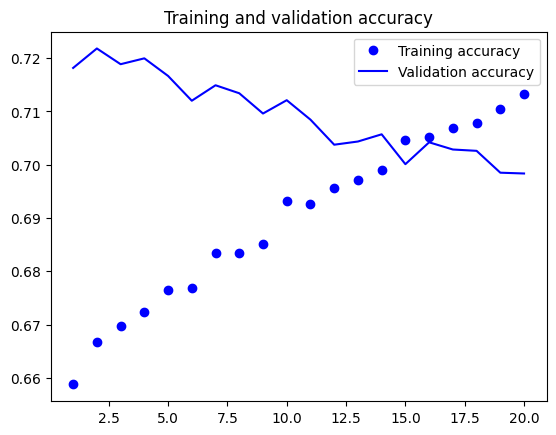

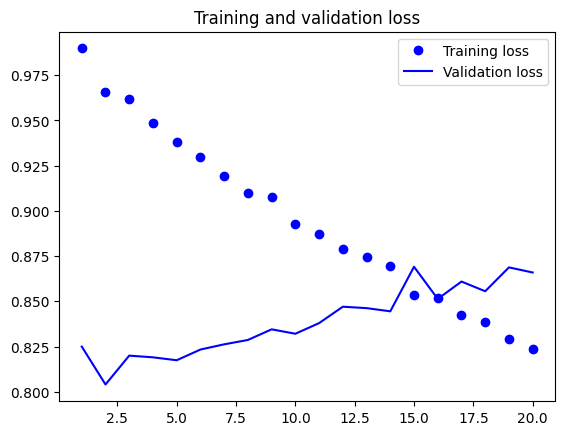

In [ ]:
#splits the data into n_splits equal-sized folds i.e., 3 folds for training and vaidation.
kfold = KFold(n_splits=3, shuffle=True)

#trains the model
#iterate over the splits and train the model on each fold while evaluating its performance on the validation set
foldNo = 1
for train, val in kfold.split(train_images, train_labels):
  print(f'The current Fold is : {foldNo}')
  history = model.fit(train_images[train],
            train_labels[train],
            callbacks=callbacks,
            epochs=20,
            validation_data=(train_images[val], train_labels[val]),
            batch_size=128)
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, "bo", label="Training accuracy")
  plt.plot(epochs, val_acc, "b", label="Validation accuracy")
  plt.title("Training and validation accuracy")
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.legend()
  plt.show()
  foldNo=foldNo+1

#Analysis

So the best accuracy we get is with this model is around 70% with the CNN architecture and different other methods. As we can see from the above graph the overfitting does start in 3rd fold. Initially 5 or 10 folds were used which gave a really good accuracy but it was understood that overfitting is happening hence different things were tried which gave us the final model. We could have stopped at 2 folds also but I felt there can be a bit of improvement in 3rd fold.


### Final Testing Code

In [ ]:
from tensorflow.keras import models
import pickle
import tensorflow as tf

model = models.load_model("/content/drive/MyDrive/Colab Notebooks/DL/Project1/Rishabh_Bassi_532008692_Project1.h5")
test_labels = pickle.load(open("./636_project1_test_labels", 'rb'))
test_images = pickle.load(open("./636_project1_test_images", 'rb'))

# Include your data preprocessing code if applicable
# <your data preprocessing code>
# Include your data preprocessing code if applicable

test_loss, test_acc = model.evaluate(test_images, test_labels)
your_score = round(test_acc*1000) / 10
print(f"Your Score: {your_score}")

### References

**The below code is just for reference - Not the main code.**
This is the base code for the model all in one place where different variations were tried.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The current Fold is : 1
Epoch 1/20
313/313 [==============================] - 16s 13ms/step - loss: 2.3252 - accuracy: 0.2262 - val_loss: 2.3132 - val_accuracy: 0.1687
Epoch 2/20
 14/313 [>.............................] - ETA: 2s - loss: 1.9644 - accuracy: 0.3058

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 11ms/step - loss: 1.9546 - accuracy: 0.3128 - val_loss: 1.9501 - val_accuracy: 0.3095
Epoch 3/20
313/313 [==============================] - 4s 12ms/step - loss: 1.8614 - accuracy: 0.3492 - val_loss: 1.8527 - val_accuracy: 0.3512
Epoch 4/20
313/313 [==============================] - 4s 12ms/step - loss: 1.7824 - accuracy: 0.3772 - val_loss: 1.7667 - val_accuracy: 0.3857
Epoch 5/20
313/313 [==============================] - 4s 13ms/step - loss: 1.6180 - accuracy: 0.4401 - val_loss: 1.5499 - val_accuracy: 0.4663
Epoch 6/20
313/313 [==============================] - 4s 12ms/step - loss: 1.4325 - accuracy: 0.5056 - val_loss: 1.4005 - val_accuracy: 0.5168
Epoch 7/20
313/313 [==============================] - 4s 12ms/step - loss: 1.3189 - accuracy: 0.5454 - val_loss: 1.3049 - val_accuracy: 0.5508
Epoch 8/20
313/313 [==============================] - 3s 11ms/step - loss: 1.2364 - accuracy: 0.5750 - val_loss: 1.2671 - val_accuracy: 0.5659
Epoch 9/20

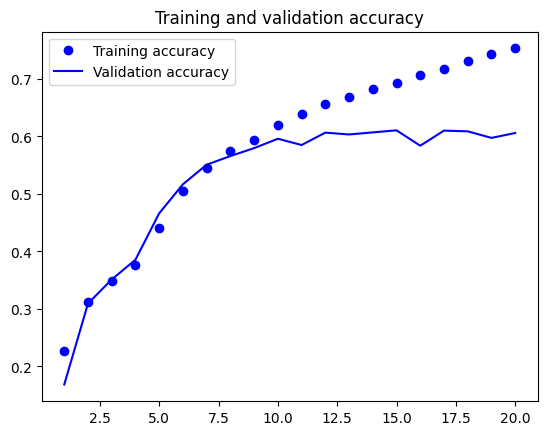

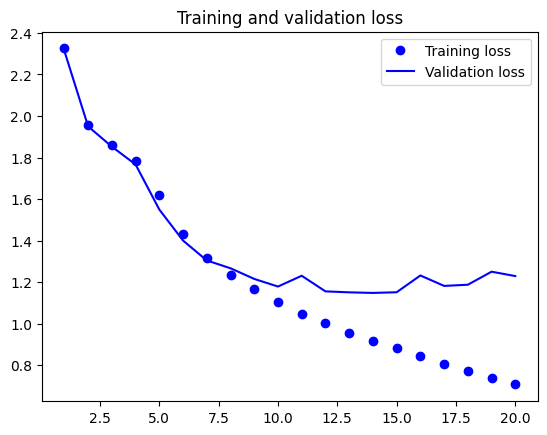

The current Fold is : 2
Epoch 1/20
313/313 [==============================] - 4s 12ms/step - loss: 0.9979 - accuracy: 0.6656 - val_loss: 0.6441 - val_accuracy: 0.7818
Epoch 2/20
313/313 [==============================] - 3s 11ms/step - loss: 0.8960 - accuracy: 0.6943 - val_loss: 0.6318 - val_accuracy: 0.7861
Epoch 3/20
313/313 [==============================] - 4s 12ms/step - loss: 0.8435 - accuracy: 0.7094 - val_loss: 0.6638 - val_accuracy: 0.7710
Epoch 4/20
313/313 [==============================] - 4s 11ms/step - loss: 0.8013 - accuracy: 0.7221 - val_loss: 0.6786 - val_accuracy: 0.7628
Epoch 5/20
313/313 [==============================] - 4s 11ms/step - loss: 0.7635 - accuracy: 0.7346 - val_loss: 0.8249 - val_accuracy: 0.7122
Epoch 6/20
313/313 [==============================] - 3s 11ms/step - loss: 0.7352 - accuracy: 0.7440 - val_loss: 0.7277 - val_accuracy: 0.7449
Epoch 7/20
313/313 [==============================] - 4s 12ms/step - loss: 0.6957 - accuracy: 0.7567 - val_loss: 0.758

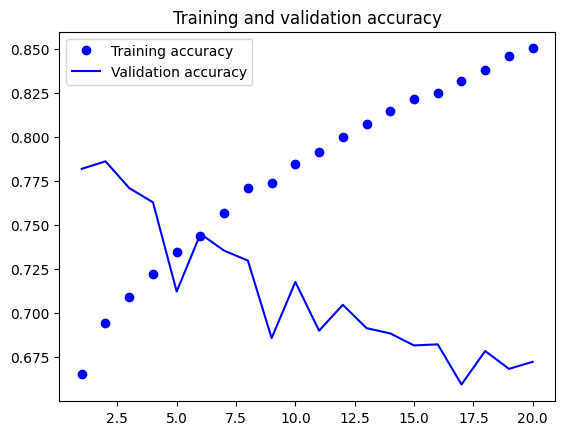

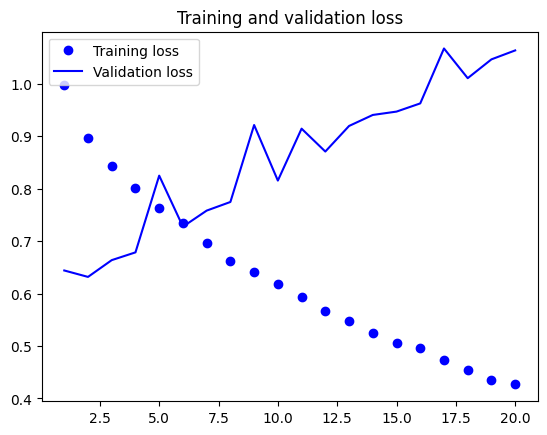

The current Fold is : 3
Epoch 1/20
313/313 [==============================] - 4s 11ms/step - loss: 0.8709 - accuracy: 0.7227 - val_loss: 0.2792 - val_accuracy: 0.9122
Epoch 2/20
313/313 [==============================] - 4s 11ms/step - loss: 0.7389 - accuracy: 0.7485 - val_loss: 0.2633 - val_accuracy: 0.9309
Epoch 3/20
313/313 [==============================] - 4s 11ms/step - loss: 0.6846 - accuracy: 0.7643 - val_loss: 0.3003 - val_accuracy: 0.9060
Epoch 4/20
313/313 [==============================] - 4s 12ms/step - loss: 0.6333 - accuracy: 0.7789 - val_loss: 0.3156 - val_accuracy: 0.9123
Epoch 5/20
313/313 [==============================] - 4s 11ms/step - loss: 0.6034 - accuracy: 0.7875 - val_loss: 0.3326 - val_accuracy: 0.8950
Epoch 6/20
313/313 [==============================] - 3s 10ms/step - loss: 0.5707 - accuracy: 0.7979 - val_loss: 0.3401 - val_accuracy: 0.8916
Epoch 7/20
313/313 [==============================] - 4s 11ms/step - loss: 0.5444 - accuracy: 0.8080 - val_loss: 0.370

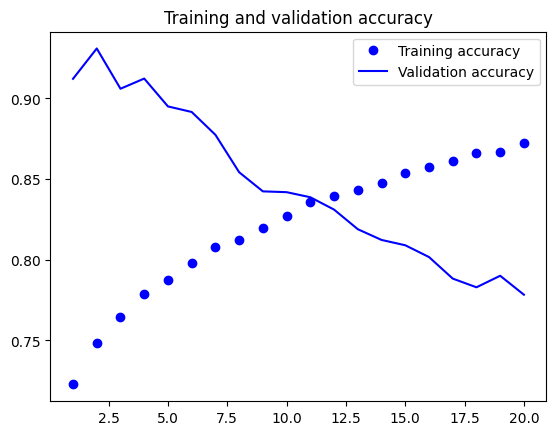

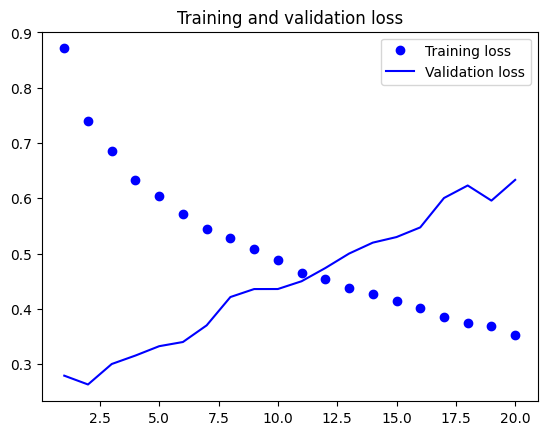

In [ ]:
import pickle
import tensorflow as tf
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from pathlib import Path
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from keras.src.backend import batch_normalization


from google.colab import drive
drive.mount('/content/drive')

#Import train_images and train_labels using pickle
with open('/content/drive/MyDrive/Colab Notebooks/DL/Project1/636_project1_train_images', 'rb') as f:
    train_images = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/DL/Project1/636_project1_train_labels', 'rb') as f:
    train_labels = pickle.load(f)

cleanModel=tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/DL/Project1/basemodel_cleandata.h5")

train_images = train_images.numpy()
train_labels = train_labels.numpy()

train_images = train_images.astype('float32') / 255.0

train_images.shape
train_labels.shape

#splits the data into n_splits equal-sized folds i.e., 3 folds for training and vaidation.
kfold = KFold(n_splits=3, shuffle=True)

#to increase the diversity of the training data
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"), #flips the train_images horizontally
        # layers.RandomRotation(0.1), #randomly rotates the input image by a small angle
        # layers.RandomZoom(0.2), #randomly zooms in or out of the train_images
    ]
)

inputs = keras.Input(shape=(28, 28, 1))  # train_images to have a height & width of 28 pixels and 1 channel (greyscale)
x = data_augmentation(inputs)  # Applies data augmentation pipeline

# Add the layers from cleanModel to your new model
# for layer in cleanModel.layers:
#     x = layer(inputs)
# x = cleanModel(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64,(3,3), activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(128,(3,3), activation="relu",padding="same")(x)
x = layers.Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Early stopping callback
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True
# )

# Compile the model, specifying the optimizer, loss function, and evaluation metric.
# We use the Adam optimizer with a learning rate of 0.0005. Adam adapts the learning rate based on the loss gradient.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# For the loss function, we employ 'sparse_categorical_crossentropy,' which is a common choice for multi-class classification tasks.
loss_function = "sparse_categorical_crossentropy"

# Our model will be evaluated using the 'accuracy' metric, which measures the proportion of correctly classified images in the validation set.
evaluation_metric = ["accuracy"]

# Compile the model with the defined optimizer, loss function, and evaluation metric.
model.compile(optimizer=optimizer, loss=loss_function, metrics=evaluation_metric)

# Set up a callback to save the best-performing model to a file named 'Project1Model.h5.'
# With 'save_best_only=True,' only the model that performs the best on the validation set will be saved.
callbacks = [keras.callbacks.ModelCheckpoint("Project1Model.h5", save_best_only=True)]


#trains the model
foldNo = 1
for train, val in kfold.split(train_images, train_labels):
  print(f'The current Fold is : {foldNo}')
  history = model.fit(train_images[train],
            train_labels[train],
            callbacks=callbacks,
            epochs=20,
            validation_data=(train_images[val], train_labels[val]),
            batch_size=128)
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, "bo", label="Training accuracy")
  plt.plot(epochs, val_acc, "b", label="Validation accuracy")
  plt.title("Training and validation accuracy")
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.legend()
  plt.show()
  foldNo=foldNo+1